In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook, trange

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree, DistanceMetric
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

from matplotlib.ticker import MaxNLocator

In [2]:
#train_full = pd.read_csv("MNIST_train.csv")

colnames = ["dig"] + [i for i in range(1, 28*28+1)]
train = pd.read_csv("MNIST_train_small.csv", names=colnames)
test = pd.read_csv("MNIST_test_small.csv", names=colnames)

In [3]:
train.shape, test.shape

((3000, 785), (1000, 785))

In [4]:
X_train = train.values[:, 1:]
y_train = train.values[:, 0]

X_test = test.values[:, 1:]
y_test = test.values[:, 0]

### (a) Implementation

In [5]:
import knn

(a) Results for $k$ in $\{ 1, ..., 20 \}$.

In [6]:
cl = knn.KNN(algorithm='kd_tree') # 'brute'
cl.fit(X_train, y_train)

In [7]:
# clb = knn.KNN(algorithm='brute')
# clb.fit(X_train, y_train)

Test accuracy/loss

In [8]:
# Test accuracy/loss
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = cl.predict(X_test, k)
    accuracy = accuracy_score(y_test, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [9]:
# Test accuracy/loss
tab_test_metrics = pd.DataFrame(data={"k": ks, "accuracy": accs, "loss": loss_values})
tab_test_metrics

,k,accuracy,loss
0,1,0.91500,0.08500
1,2,0.91500,0.08500
2,3,0.92300,0.07700
3,4,0.92400,0.07600
4,5,0.92800,0.07200
5,6,0.92400,0.07600
6,7,0.92000,0.08000
7,8,0.91900,0.08100
8,9,0.91700,0.08300
9,10,0.91000,0.09000


The best accuracy (0.928) on the TEST set is achieved with k = 5 


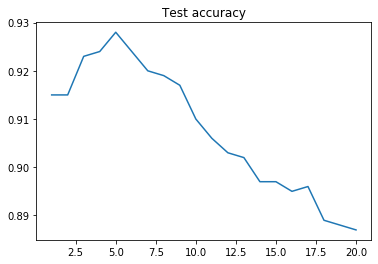

In [10]:
plt.plot(ks, accs);
plt.title("Test accuracy");
print(f"The best accuracy ({max(tab_test_metrics['accuracy'].values)}) on the TEST set is achieved with k = {ks[np.argmax(tab_test_metrics['accuracy'].values)]} ")

The minimum loss (0.07199999999999995) on the TEST set is achieved with k = 5 


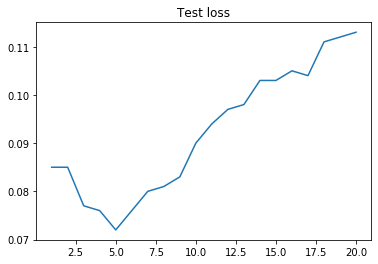

In [11]:
plt.plot(ks, loss_values);
plt.title("Test loss");
print(f"The minimum loss ({min(tab_test_metrics['loss'].values)}) on the TEST set is achieved with k = {ks[np.argmin(tab_test_metrics['loss'].values)]} ")

Train accuracy/loss

In [12]:
# Train accuracy/loss
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = cl.predict(X_train, k)
    accuracy = accuracy_score(y_train, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [13]:
# Train accuracy/loss
tab_train_metrics = pd.DataFrame(data={"k": ks, "accuracy": accs, "loss": loss_values})
tab_train_metrics

,k,accuracy,loss
0,1,1.00000,0.00000
1,2,1.00000,0.00000
2,3,0.97267,0.02733
3,4,0.97300,0.02700
4,5,0.95933,0.04067
5,6,0.95733,0.04267
6,7,0.94867,0.05133
7,8,0.94667,0.05333
8,9,0.93767,0.06233
9,10,0.93733,0.06267


The best accuracy (1.0) on the TRAIN set is achieved with k = 1 


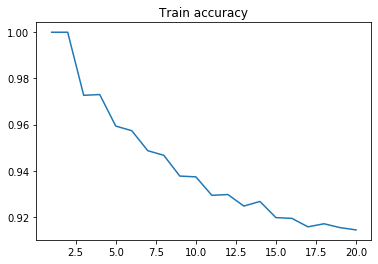

In [14]:
plt.plot(ks, accs);
plt.title("Train accuracy");
print(f"The best accuracy ({max(tab_train_metrics['accuracy'].values)}) on the TRAIN set is achieved with k = {ks[np.argmax(tab_train_metrics['accuracy'].values)]} ")

The minimum loss (0.0) on the TRAIN set is achieved with k = 1 


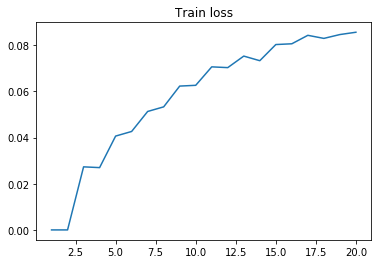

In [15]:
plt.plot(ks, loss_values);
plt.title("Train loss");
print(f"The minimum loss ({min(tab_train_metrics['loss'].values)}) on the TRAIN set is achieved with k = {ks[np.argmin(tab_train_metrics['loss'].values)]} ")

**??? Explain how ties are broken in Equation 1. ???**

### (b) Leave-One-Out Cross-Validation

In [16]:
ks = range(1, 21)
accs = []
loss_values = []

for k in tqdm_notebook(ks):
    preds = cl.predict(X_train, k+1, exclude_nearest=True) # !
    accuracy = accuracy_score(y_train, preds)

    accs.append(accuracy)
    loss_values.append(1-accuracy)

In [17]:
# LOOCV accuracy/loss
tab_loocv_metrics = pd.DataFrame(data={"k": ks, "accuracy": accs, "loss": loss_values})
tab_loocv_metrics

,k,accuracy,loss
0,1,0.91933,0.08067
1,2,0.91933,0.08067
2,3,0.92700,0.07300
3,4,0.92700,0.07300
4,5,0.92167,0.07833
5,6,0.92100,0.07900
6,7,0.91833,0.08167
7,8,0.91767,0.08233
8,9,0.91667,0.08333
9,10,0.91133,0.08867


The best LOOCV accuracy (0.927) (using only TRAIN set) is achieved with k = 3


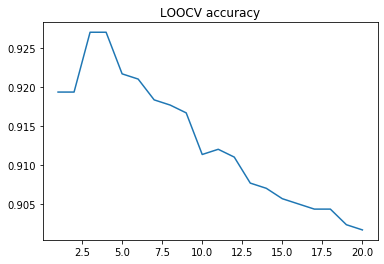

In [18]:
plt.plot(ks, accs);
plt.title("LOOCV accuracy");
print(f"The best LOOCV accuracy ({max(tab_loocv_metrics['accuracy'].values)}) (using only TRAIN set) is achieved with k = {ks[np.argmax(tab_loocv_metrics['accuracy'].values)]}")

The minimum LOOCV loss (0.07299999999999995) is achieved with k = 3 


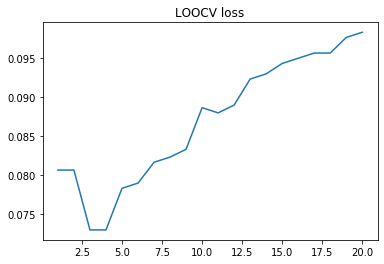

In [19]:
plt.plot(ks, loss_values);
plt.title("LOOCV loss");
print(f"The minimum LOOCV loss ({min(tab_loocv_metrics['loss'].values)}) is achieved with k = {ks[np.argmin(tab_loocv_metrics['loss'].values)]} ")

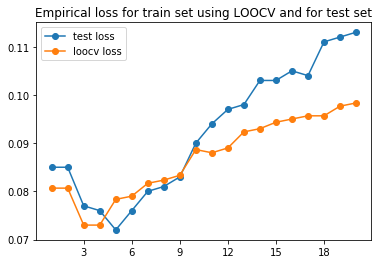

In [20]:
fig, ax = plt.subplots()
plt.title("Empirical loss for train set using LOOCV and for test set");
plt.plot(ks, tab_test_metrics['loss'], '-o', label='test loss');
plt.plot(ks, tab_loocv_metrics['loss'], '-o', label='loocv loss');
plt.legend();
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# k=3 looks like the best value, chosen on cross-validation